In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [43]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

## Watershed Algorithm

Step 1: Read Image

In [44]:
img = cv2.imread('../DATA/pennies.jpg')

Step 2: Apply Blur

In [45]:
img1 = cv2.medianBlur(img,ksize=35)

Step 3: Conver to Grayscale

In [46]:
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

Step 4: Apply Threshold (Inverse Binary with OTSU as well)

In [47]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

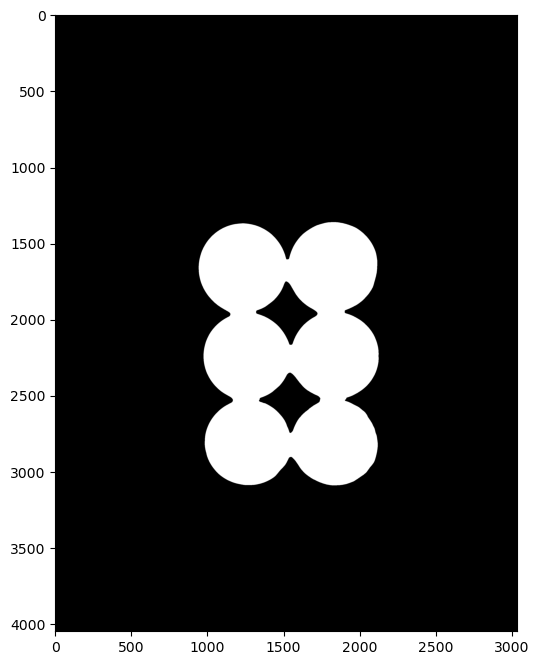

In [48]:
display(thresh,cmap='gray')

Optional Step 5: Noise Removal

In [49]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

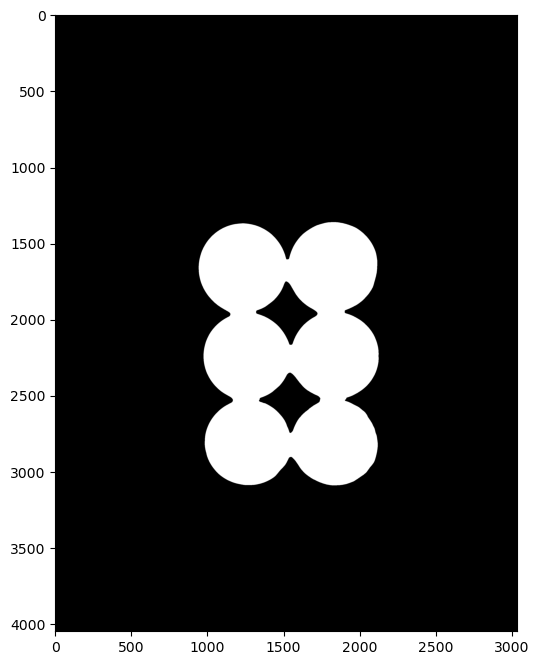

In [50]:
display(opening,'gray')

Step 6: Grab Background that you are sure of

In [51]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

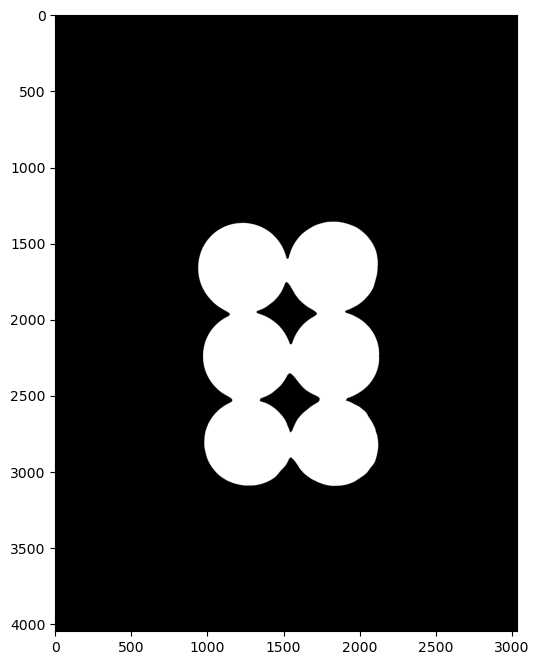

In [52]:
display(sure_bg,'gray')

Step 7: Find Sure Foreground

In [53]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

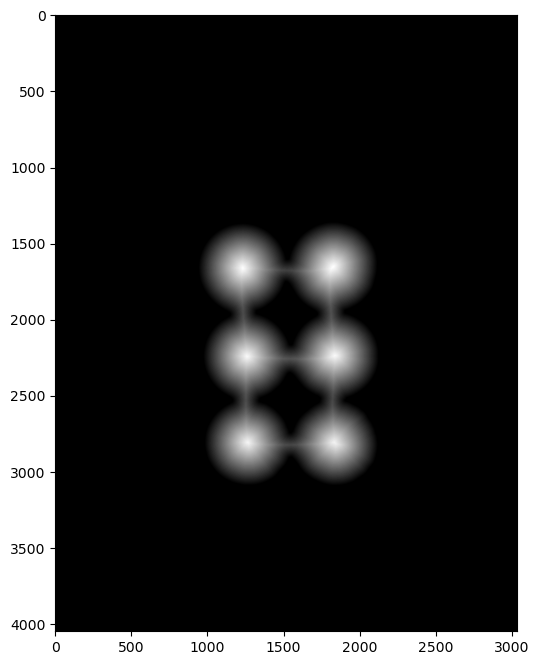

In [54]:
display(dist_transform,'gray')

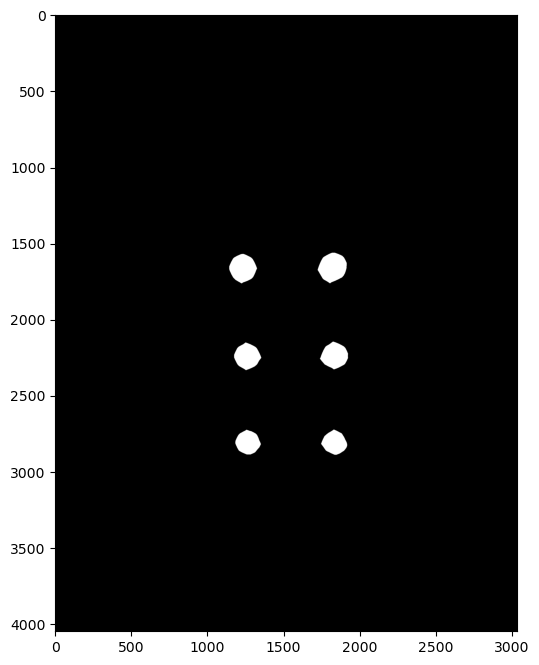

In [55]:
display(sure_fg,'gray')

Step 8: Find Unknown Region

In [56]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

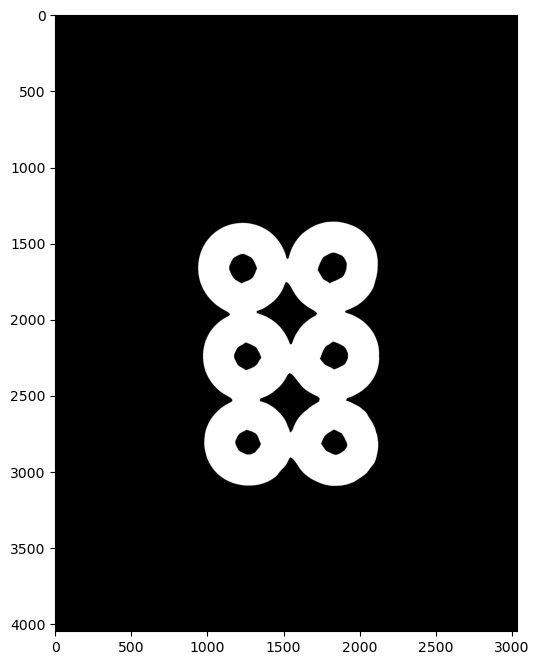

In [57]:
display(unknown,'gray')

Step 9: Label Markers of Sure Foreground

In [58]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

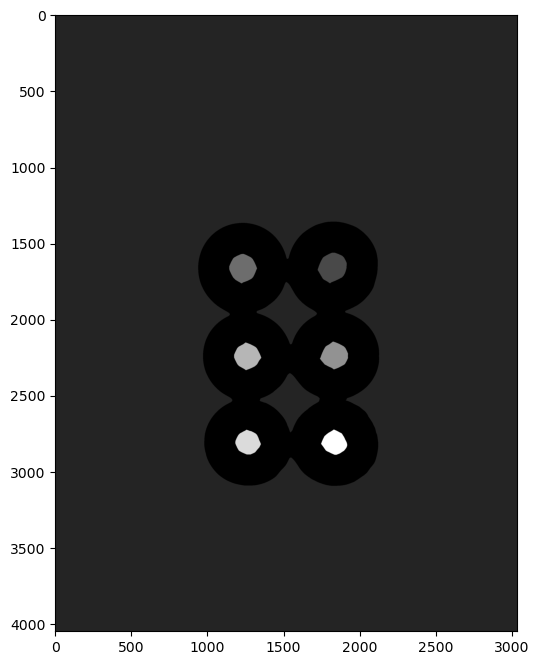

In [59]:
display(markers, 'gray')

#### Step 10: Apply Watershed Algorithm to find Markers

In [60]:
markers = cv2.watershed(img, markers)

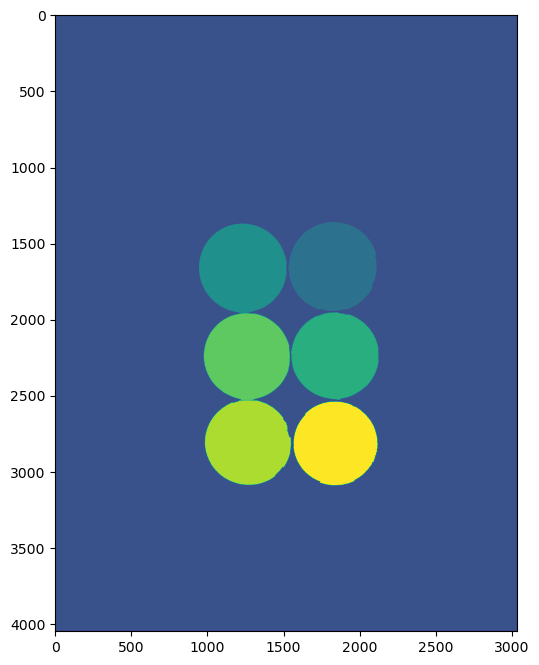

In [61]:
display(markers)

Step 11: Find Contours on Markers

In [62]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):

    if hierarchy[0][i][3] ==-1:
        cv2.drawContours(img,contours,i,(255,0,0),12)

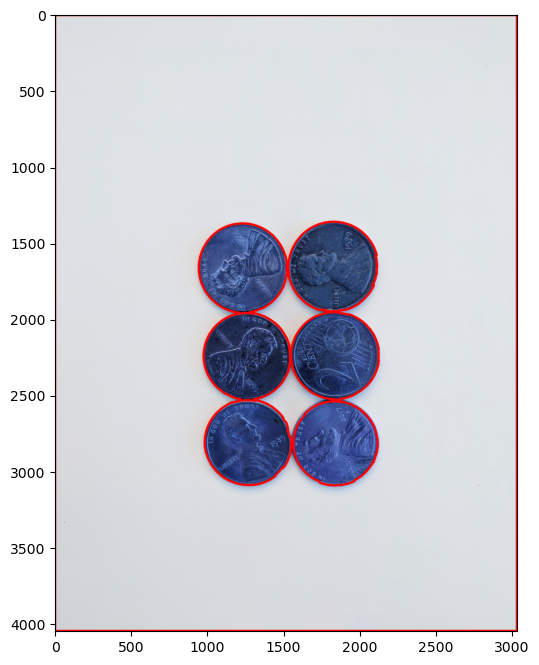

In [63]:
display(img)